## Exercises - Database Operations

Let's create a table and perform database operations using direct SQL.

### Exercise 1 - Create Table

Create table - **courses**
* course_id - sequence generated integer and primary key
* course_name - which holds alpha numeric or string values up to 60 characters
* course_author - which holds the name of the author up to 40 characters
* course_status - which holds one of these values (published, draft, inactive). 
* course_published_dt - which holds date type value. 

Code:
```sql
CREATE TABLE courses (
    course_id int IDENTITY,     
    course_name VARCHAR(60) NOT NULL, 
    course_author VARCHAR(40) NOT NULL,
    course_status VARCHAR(10) NOT NULL,
    course_published_dt DATE DEFAULT getdate()
);
ALTER TABLE courses
ADD CONSTRAINT pk_courses_course_id PRIMARY KEY CLUSTERED (course_id),
	CONSTRAINT CHK_courses_course_status CHECK (course_status='published' OR course_status='draft' OR course_status='inactive');
```


### Exercise 2 - Inserting Data

* Insert data into courses using the data provided. Make sure id is system generated.

|Course Name                      |Course Author         |Course Status|Course Published Date|
|---------------------------------|----------------------|-------------|---------------------|
|Programming using Python         |Bob Dillon            |published    |2020-09-30           |
|Data Engineering using Python    |Bob Dillon            |published    |2020-07-15           |
|Data Engineering using Scala     |Elvis Presley         |draft        |                     |
|Programming using Scala          |Elvis Presley         |published    |2020-05-12           |
|Programming using Java           |Mike Jack             |inactive     |2020-08-10           |
|Web Applications - Python Flask  |Bob Dillon            |inactive     |2020-07-20           |
|Web Applications - Java Spring   |Mike Jack             |draft        |                     |
|Pipeline Orchestration - Python  |Bob Dillon            |draft        |                     |
|Streaming Pipelines - Python     |Bob Dillon            |published    |2020-10-05           |
|Web Applications - Scala Play    |Elvis Presley         |inactive     |2020-09-30           |
|Web Applications - Python Django |Bob Dillon            |published    |2020-06-23           |
|Server Automation - Ansible      |Uncle Sam             |published    |2020-07-05           |


Code:
```sql
INSERT INTO courses
    (course_name, course_author, course_status, course_published_dt)
VALUES
    ('Programming using Python', 'Bob Dillon', 'published', '2020-09-30'),
    ('Data Engineering using Python', 'Bob Dillon', 'published', '2020-07-15'),
	('Data Engineering using Scala', 'Elvis Presley', 'draft', ''),
	('Programming using Scala', 'Elvis Presley ', 'published', '2020-05-12'),
	('Programming using Java', 'Mike Jack', 'inactive', '2020-08-10'),
	('Web Applications - Python Flask', 'Bob Dillon', 'inactive', '2020-07-20'),
	('Web Applications - Java Spring', 'Mike Jack', 'draft', ''),
	('Pipeline Orchestration - Python', 'Bob Dillon', 'draft', ''),
	('Streaming Pipelines - Python', 'Bob Dillon', 'published', '2020-10-05'),
	('Web Applications - Scala Play', 'Elvis Presley', 'inactive', '2020-09-30'),
	('Web Applications - Python Django', 'Bob Dillon', 'published', '2020-06-23'),
	('Server Automation - Ansible', 'Uncle Sam', 'published', '2020-07-05');
```

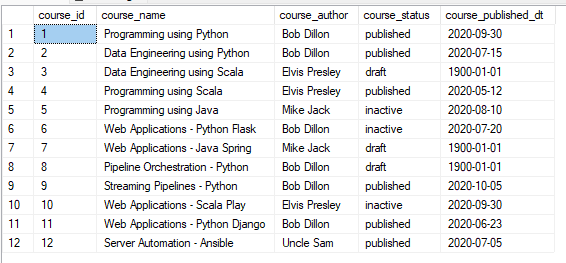

### Exercise 3 - Updating Data

Update the status of all the **draft courses** related to Python and Scala to **published** along with the **course_published_dt using system date**. 

Code:
```sql
UPDATE courses
SET
	course_status = 'published',
	course_published_dt = GETDATE()
WHERE course_status = 'draft'
AND (course_name LIKE '%Python%' OR course_name LIKE '%Scala%');
```


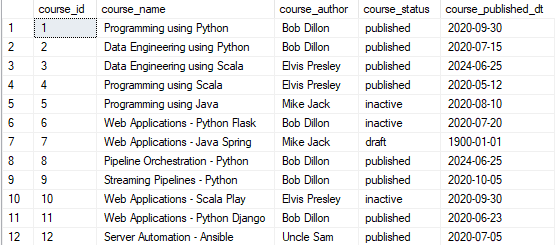

### Exercise 4 - Deleting Data

Delete all the courses which are neither in draft mode nor published.

Code:
```sql
DELETE FROM courses 
WHERE course_status != 'draft' AND course_status != 'published';
```

Validation - Get count of all published courses by author and make sure output is sorted in descending order by count. 

```sql
SELECT course_author, count(1) AS course_count
FROM courses
WHERE course_status= 'published'
GROUP BY course_author
```

|Course Author   |Course Count|
|----------------|------------|
|Bob Dillon      |5           |
|Elvis Presley   |2           |
|Uncle Sam       |1           |

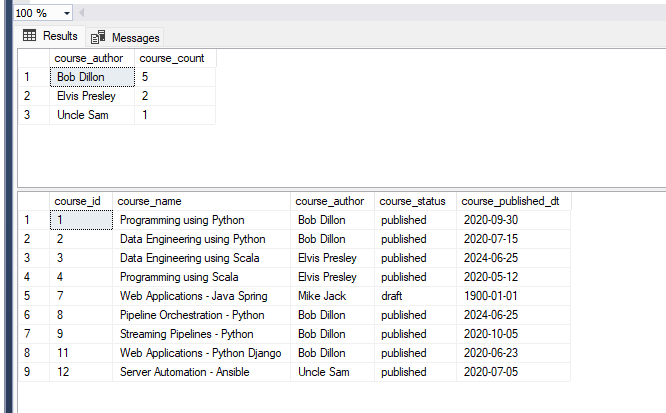